In [1]:
!pip install transformers datasets wandb

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import torch

torch.cuda.is_available()

True

In [3]:
from datasets import load_dataset

import pandas as pd

df = pd.read_csv('EPITOME_pairs2.csv')
df['text'] = '#Sentence:' + df['seeker_post'] + '#Sentence:' + df['response_post']
df['label'] = df['level']

df[['text', 'label']].to_csv('EPITOME_pairs3.csv', index=False)

dataset = load_dataset("csv", data_files="EPITOME_pairs3.csv")

Generating train split: 0 examples [00:00, ? examples/s]

In [4]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_dataset = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/3084 [00:00<?, ? examples/s]

In [5]:
ds = tokenized_dataset['train'].train_test_split(test_size=0.1, shuffle=True, seed=42)
ds_test = ds['test']
ds_train = ds['train'].train_test_split(test_size=0.15, shuffle=True, seed=42)
ds_val = ds_train['test']
ds_train = ds_train['train']

In [6]:
from transformers import BertForSequenceClassification, AdamW

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=1)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [7]:
%env WANDB_PROJECT = Empathy_project

env: WANDB_PROJECT=Empathy_project


In [8]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir='EPITOME10',
    evaluation_strategy="epoch",
    learning_rate=5e-6,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=10,
    weight_decay=0.01,
    report_to='wandb'
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=ds_train,
    eval_dataset=ds_val,

)

trainer.train()

C:\Users\hai_l\AppData\Roaming\Python\Python39\site-packages\transformers\training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: minooshayan97 (minoosh). Use `wandb login --relogin` to force relogin


C:\Users\hai_l\AppData\Roaming\Python\Python39\site-packages\transformers\models\bert\modeling_bert.py:440: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


Epoch,Training Loss,Validation Loss
1,No log,0.026805
2,No log,0.025844
3,No log,0.026464
4,0.029100,0.023685
5,0.029100,0.024252
6,0.029100,0.023603
7,0.017800,0.023711
8,0.017800,0.023233
9,0.017800,0.024019
10,0.017800,0.023982


TrainOutput(global_step=1480, training_loss=0.020320927130209433, metrics={'train_runtime': 1206.3161, 'train_samples_per_second': 19.547, 'train_steps_per_second': 1.227, 'total_flos': 6204102980751360.0, 'train_loss': 0.020320927130209433, 'epoch': 10.0})

In [10]:
predictions2 = trainer.predict(ds_test)

import pickle

with open('predictions2.pkl', 'wb') as f:
    pickle.dump(predictions2, f)

In [11]:
predictions2

PredictionOutput(predictions=array([[ 0.39316687],
       [ 0.32882196],
       [ 0.29340583],
       [ 0.30593002],
       [ 0.10674153],
       [ 0.11887754],
       [ 0.07803998],
       [ 0.14939737],
       [ 0.3668263 ],
       [ 0.54162323],
       [ 0.6405646 ],
       [ 0.4887211 ],
       [ 0.03320068],
       [ 0.11246566],
       [ 0.51954436],
       [ 0.35773417],
       [ 0.10145034],
       [ 0.3444121 ],
       [ 0.1242426 ],
       [ 0.46518397],
       [ 0.34049812],
       [ 0.3638173 ],
       [-0.01928404],
       [ 0.09749995],
       [ 0.32228458],
       [ 0.4817078 ],
       [ 0.39449376],
       [ 0.21022566],
       [ 0.33155984],
       [ 0.09926093],
       [ 0.34414536],
       [ 0.00973931],
       [ 0.01768989],
       [ 0.04359645],
       [ 0.10107656],
       [ 0.07674779],
       [ 0.26699087],
       [-0.02546869],
       [ 0.02993606],
       [ 0.3767304 ],
       [ 0.27571326],
       [ 0.13976511],
       [ 0.691913  ],
       [ 0.3821748 ],
   

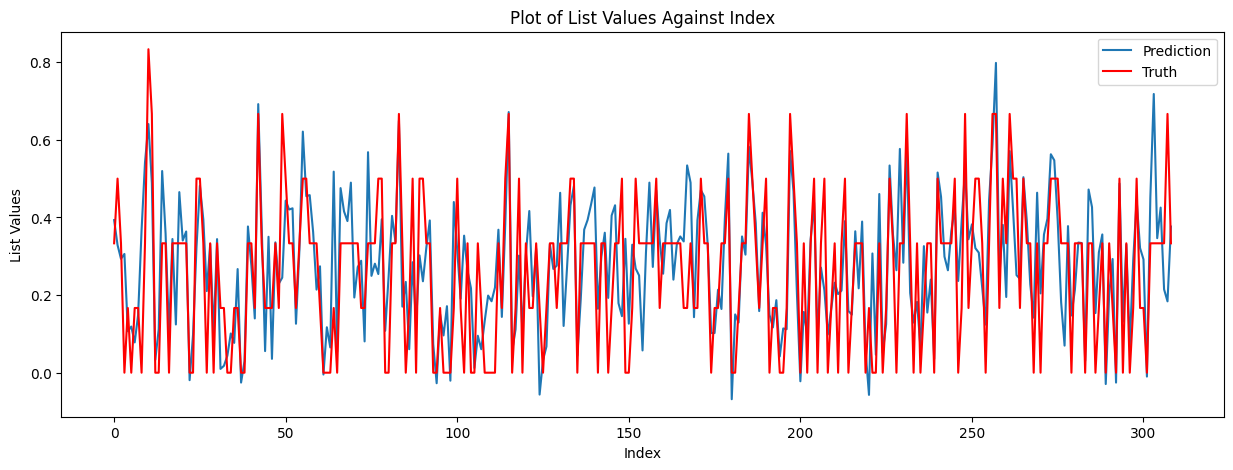

In [14]:
import matplotlib.pyplot as plt


# Set the figure size (width, height in inches)
plt.figure(figsize=(15, 5))

# Plot the first list
plt.plot(predictions2.predictions, label='Prediction')

# Plot the second list in red
plt.plot(predictions2.label_ids, color='red', label='Truth')

# Add labels, title, and a legend
plt.xlabel('Index')
plt.ylabel('List Values')
plt.title('Plot of List Values Against Index')
plt.legend()

# Show the plot
plt.show()

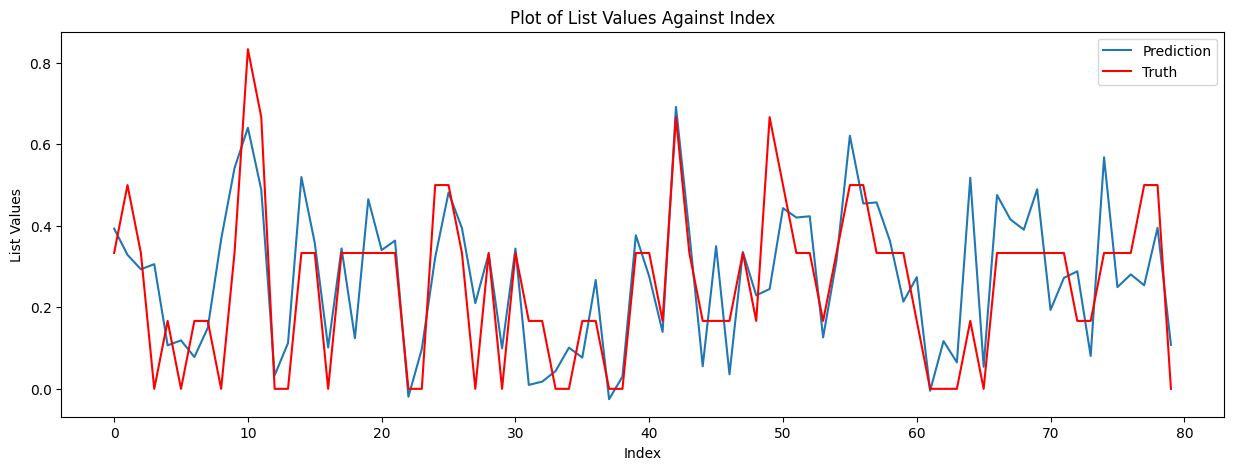

In [15]:
import matplotlib.pyplot as plt


# Set the figure size (width, height in inches)
plt.figure(figsize=(15, 5))

# Plot the first list
plt.plot(predictions2.predictions[:80], label='Prediction')

# Plot the second list in red
plt.plot(predictions2.label_ids[:80], color='red', label='Truth')

# Add labels, title, and a legend
plt.xlabel('Index')
plt.ylabel('List Values')
plt.title('Plot of List Values Against Index')
plt.legend()

# Show the plot
plt.show()

In [9]:
'''metrics = trainer.evaluate()
print(metrics)'''

'metrics = trainer.evaluate()\nprint(metrics)'